# **Detección de síndrome del ojo seco empleando atributos del estilo de vida de la persona y variables medicas**

## Import the necesary packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')

In [3]:
sns.set_context('notebook')

## Data Loading

In [4]:
url='https://drive.google.com/uc?export=download&id=1rsinyuJoJesd_UyrLaD0u-ECzJH4PHFA'

In [5]:
df=pd.read_csv(url)
df.head()

,Gender,Age,Sleep duration,Sleep quality,Stress level,Blood pressure,Heart rate,Daily steps,Physical activity,Height,...,Smoking,Medical issue,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease
0,F,24,9.5,2,1,137/89,67,3000,31,161,...,N,Y,Y,N,8.7,N,Y,Y,N,Y
1,M,39,9.6,2,3,108/64,60,12000,74,164,...,N,Y,Y,N,9.6,Y,N,N,Y,Y
2,F,45,5.4,1,5,134/81,95,12000,93,179,...,N,N,N,Y,4.0,N,Y,N,N,N
3,F,45,5.4,4,5,110/90,78,19000,32,160,...,N,Y,N,N,7.6,N,Y,N,Y,N
4,F,42,5.7,3,2,99/67,72,4000,173,179,...,N,Y,N,N,3.5,N,Y,Y,N,Y


## EDA

In [6]:
df.shape

(20000, 26)

El dataset cuenta con 20000 registros y 26 *features* o columnas

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       20000 non-null  object 
 1   Age                          20000 non-null  int64  
 2   Sleep duration               20000 non-null  float64
 3   Sleep quality                20000 non-null  int64  
 4   Stress level                 20000 non-null  int64  
 5   Blood pressure               20000 non-null  object 
 6   Heart rate                   20000 non-null  int64  
 7   Daily steps                  20000 non-null  int64  
 8   Physical activity            20000 non-null  int64  
 9   Height                       20000 non-null  int64  
 10  Weight                       20000 non-null  int64  
 11  Sleep disorder               20000 non-null  object 
 12  Wake up during night         20000 non-null  object 
 13  Feel sleepy duri

La tarea principal que se desea llevar acabo es la detección de síndrome del ojo , por lo cual , la *feature* ```Dry Eye Disease```

### Missing Values

In [8]:
print('Missing Values',df.isna().sum().sort_values(ascending=False)[:20],sep='\n')

Missing Values
Gender                         0
Age                            0
Itchiness/Irritation in eye    0
Redness in eye                 0
Discomfort Eye-strain          0
Blue-light filter              0
Average screen time            0
Smart device before bed        0
Ongoing medication             0
Medical issue                  0
Smoking                        0
Alcohol consumption            0
Caffeine consumption           0
Feel sleepy during day         0
Wake up during night           0
Sleep disorder                 0
Weight                         0
Height                         0
Physical activity              0
Daily steps                    0
dtype: int64


### Describe the samples

In [9]:
df.describe()

,Age,Sleep duration,Sleep quality,Stress level,Heart rate,Daily steps,Physical activity,Height,Weight,Average screen time
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,31.422800,6.998245,2.997250,2.993750,79.912200,10536.900000,90.069750,174.865900,74.891850,5.519885
std,8.103717,1.731723,1.412283,1.407235,11.808279,5752.729186,52.317283,14.719903,14.733839,2.606305
min,18.000000,4.000000,1.000000,1.000000,60.000000,1000.000000,0.000000,150.000000,50.000000,1.000000
25%,24.000000,5.500000,2.000000,2.000000,70.000000,6000.000000,45.000000,162.000000,62.000000,3.300000
50%,31.000000,7.000000,3.000000,3.000000,80.000000,11000.000000,91.000000,175.000000,75.000000,5.500000
75%,39.000000,8.500000,4.000000,4.000000,90.000000,16000.000000,135.000000,188.000000,88.000000,7.800000
max,45.000000,10.000000,5.000000,5.000000,100.000000,20000.000000,180.000000,200.000000,100.000000,10.000000


In [10]:
bins=int(1+np.log2(df.shape[0]))

In [11]:
categorical_features = df.select_dtypes(include='object').columns
numerical_features = df.select_dtypes(include='number').columns

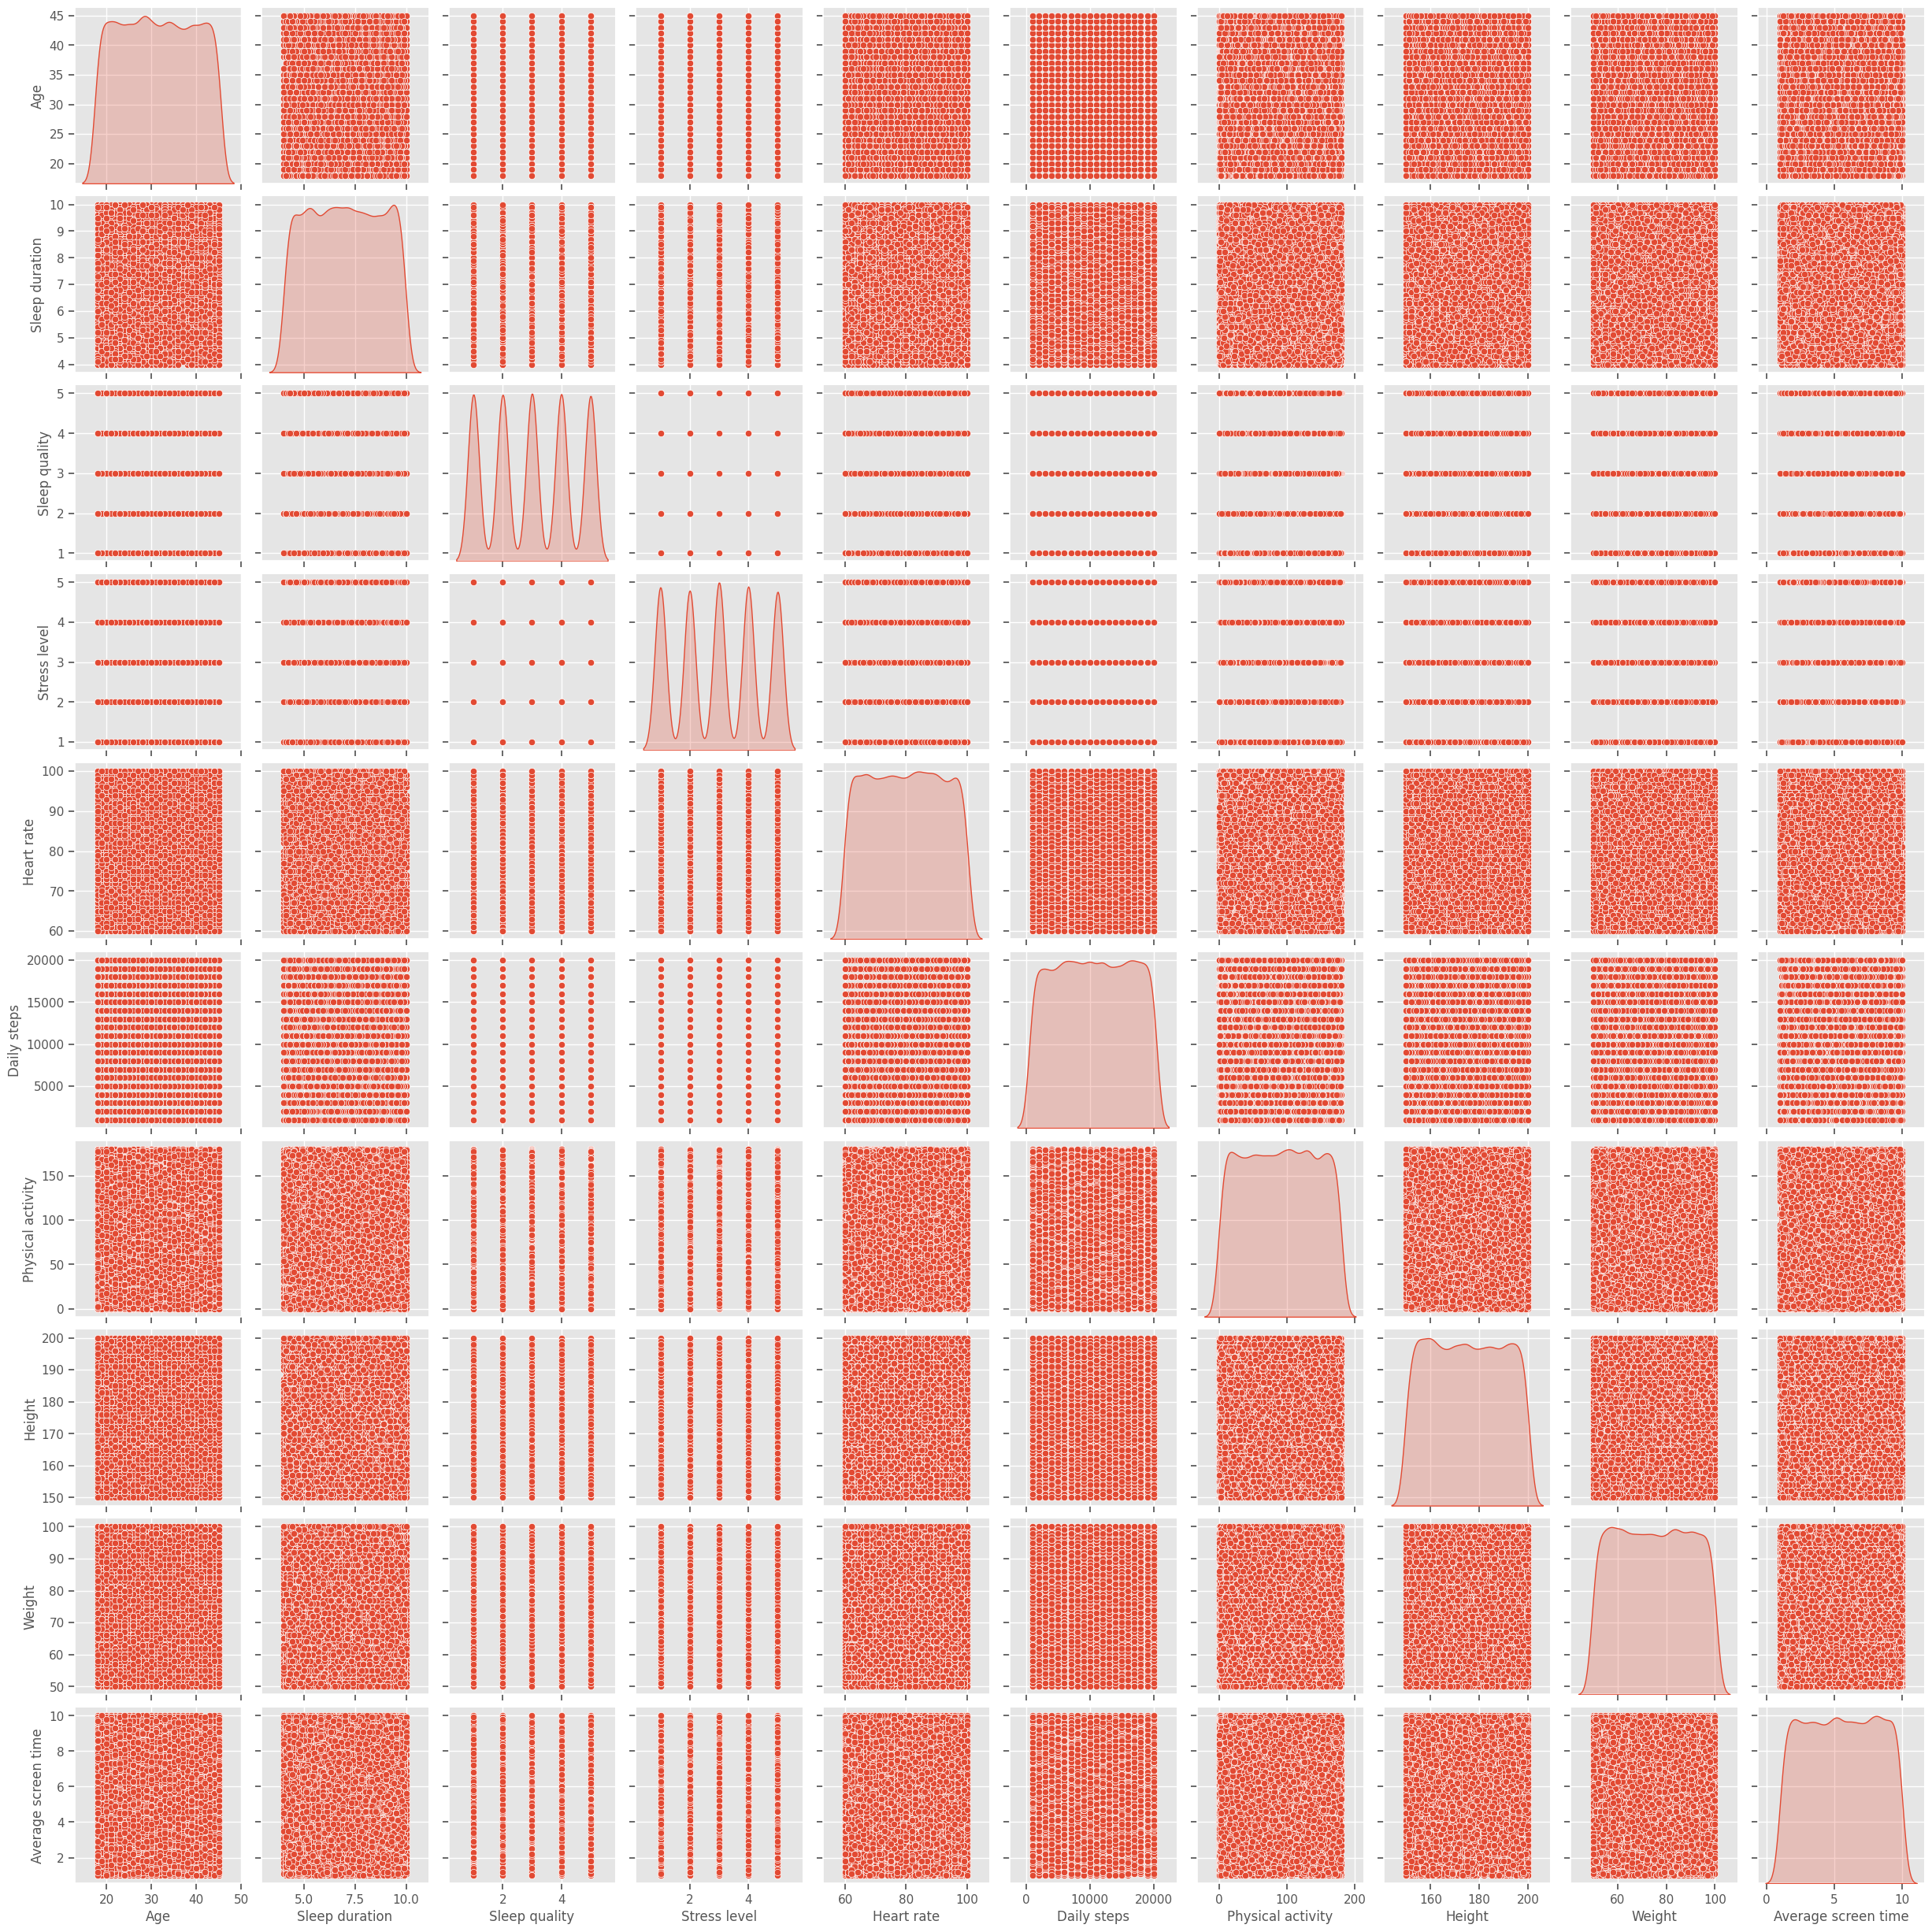

In [12]:
sns.pairplot(df[numerical_features],diag_kind='kde')
plt.show()

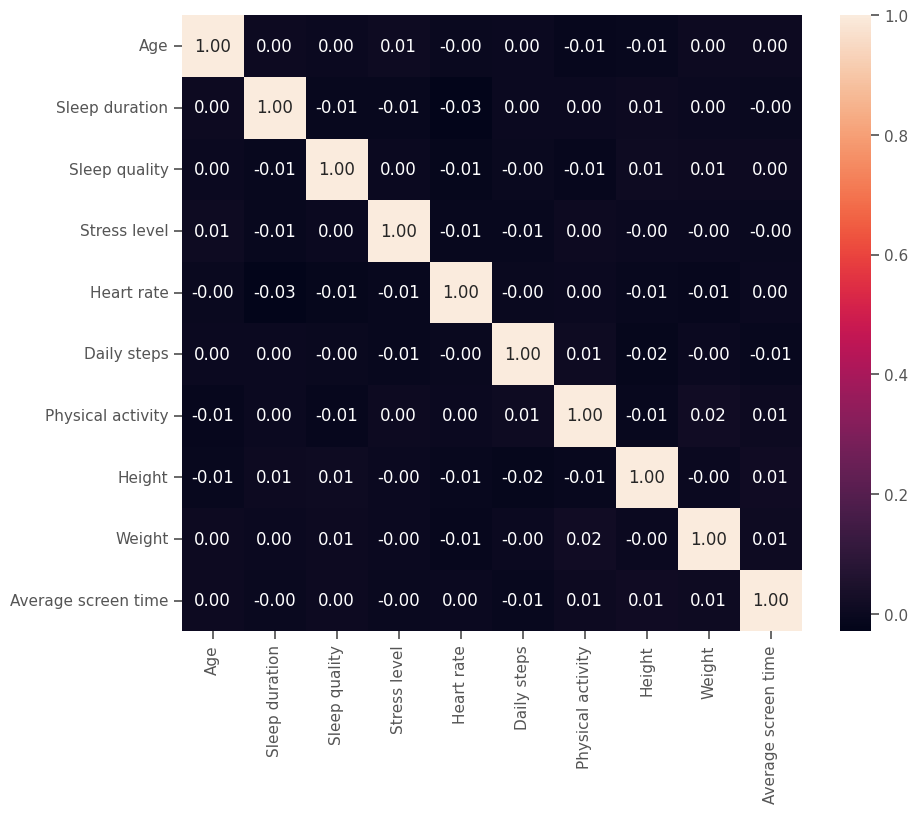

In [13]:
df[numerical_features].corr()
plt.figure(figsize=(10,8))
sns.heatmap(df[numerical_features].corr(), annot=True, fmt='.2f')
plt.show()

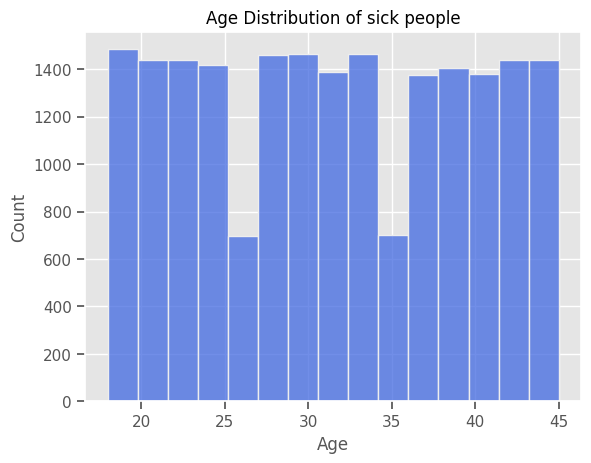

In [14]:
sns.histplot(df['Age'],bins=bins,color="royalblue")
plt.title('Age Distribution of sick people')
plt.show()

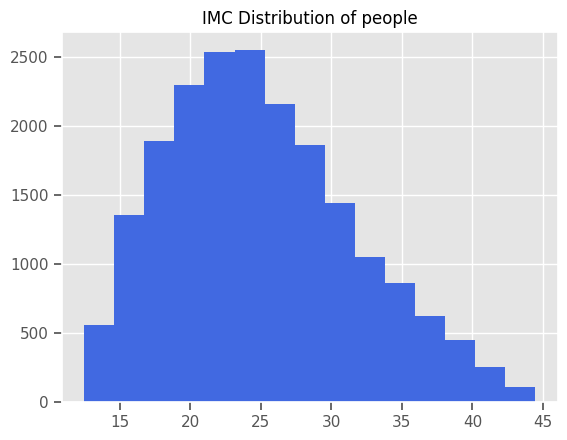

In [15]:
imc=df['Weight']/((df['Height']/100)**2)
plt.hist(imc,bins=bins,color="royalblue")
plt.title('IMC Distribution of people')
plt.show()

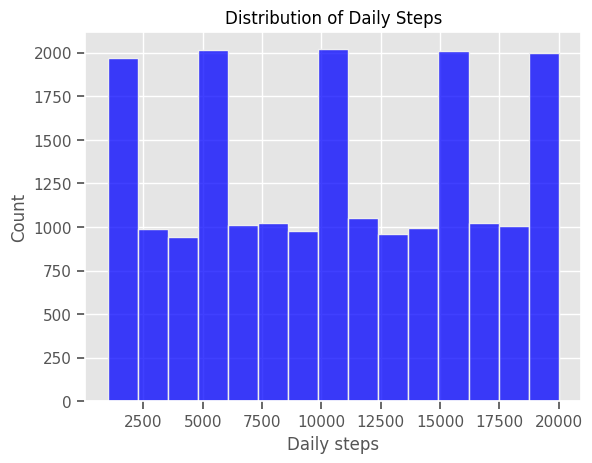

In [16]:
sns.histplot(df['Daily steps'],bins=bins,color="blue")
plt.title('Distribution of Daily Steps')
plt.show()

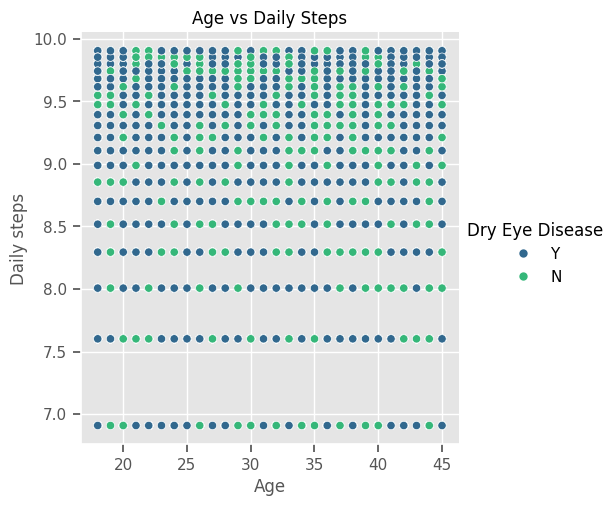

In [17]:
steps_log=np.log1p(df['Daily steps'])
sns.relplot(x='Age',y=steps_log,data=df,hue='Dry Eye Disease',palette='viridis')
plt.title('Age vs Daily Steps')
plt.show()

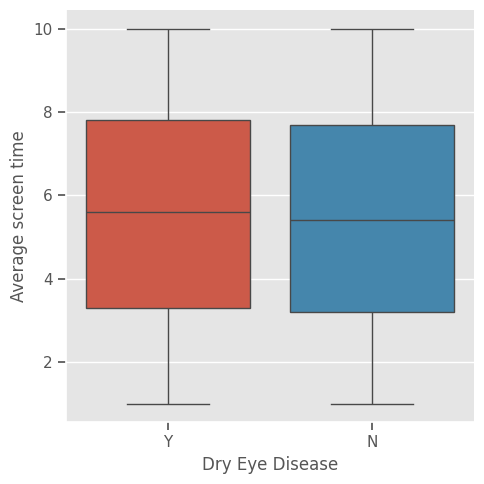

In [18]:
sns.catplot(data=df,y='Average screen time',x='Dry Eye Disease',hue='Dry Eye Disease',kind='box')
plt.show()

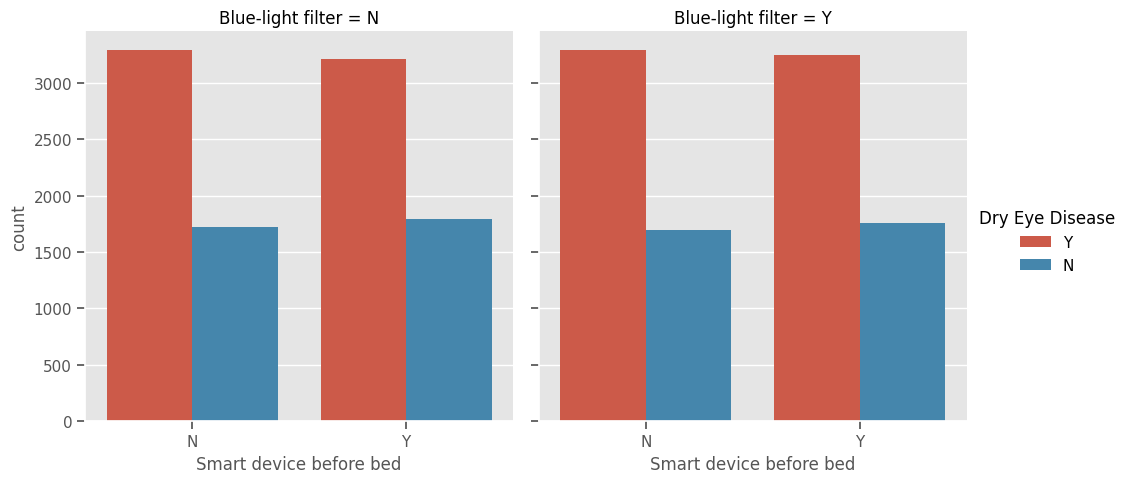

In [19]:
sns.catplot(data=df,x='Smart device before bed',kind='count',col='Blue-light filter',hue='Dry Eye Disease')
plt.show()

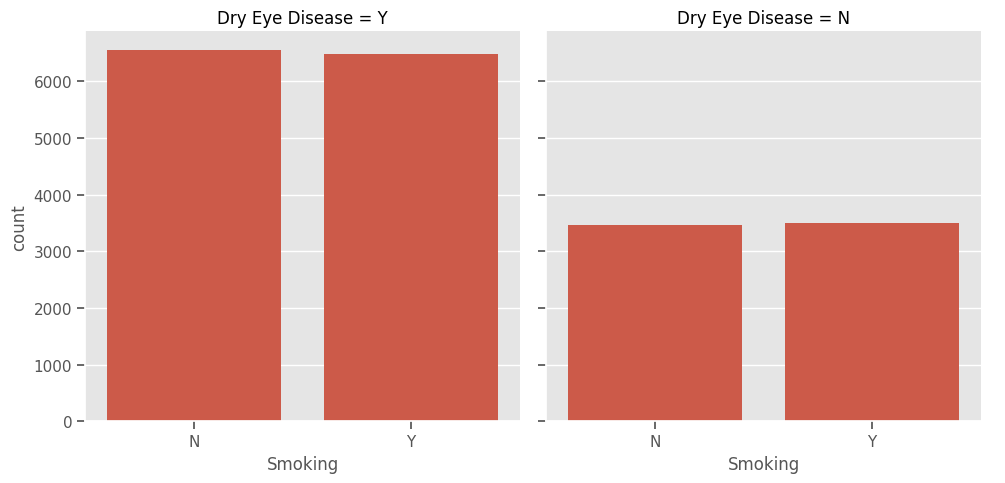

In [20]:
sns.catplot(data=df,x='Smoking',kind='count',col='Dry Eye Disease')
plt.show()

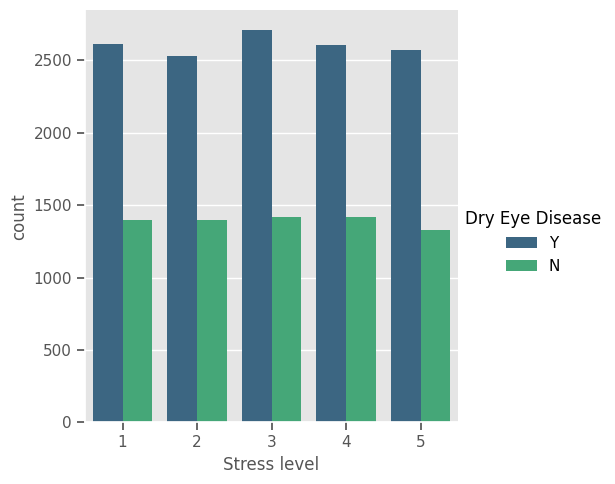

In [21]:
sns.catplot(x='Stress level',kind='count',data=df,hue='Dry Eye Disease',palette='viridis')
plt.show()

some experiment

In [22]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
# from sklearn.preprocessing import LabelEncoder
# from sklearn.svm import SVC
# from imblearn.over_sampling import SMOTE
# from collections import Counter
# from sklearn.ensemble import RandomForestClassifier

# numerical_data=df.select_dtypes(include=[np.number])
# stadarn=StandardScaler()
# numerical_data=stadarn.fit_transform(numerical_data)
# y=df['Dry Eye Disease']
# enconded_label=LabelEncoder().fit_transform(y)
# X,y=SMOTE(sampling_strategy='minority').fit_resample(numerical_data,enconded_label)
# print(Counter(y))
# model=RandomForestClassifier()
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
# model.fit(X_train,y_train)
# y_pred=model.predict(X_test)
# print('Accuracy:',accuracy_score(y_test,y_pred))

In [23]:
# print(classification_report(y_test,y_pred))

In [24]:
# from sklearn.metrics import ConfusionMatrixDisplay
# disp=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred,labels=model.classes_))
# disp.plot(cmap="viridis")
# plt.grid(False)
# plt.show()